In [199]:
import pandas as pd
import streamlit as st 
import plotly.express as px

In [72]:
def ler_excel(excel):

    df = pd.read_excel(excel)
    df[['Curso','Campus','Turno']]  = df['Cargo'].str.split('-',expand=True)
    df  = df[['Curso','Tipo de Vaga','Campus','Turno',"Nivel","Inscritos","Pagos", "Isenções deferidas","Inscrições homologadas"]]
    df.rename({"Isenções deferidas": 'Deferidas', "Inscrições homologadas": 'Homologadas'}, axis=1, inplace=True) 
    df['Campus'] = df['Campus'].apply(lambda r: r.replace("Campus","").replace("campus","").strip().upper() )
    df['Curso'] = df['Curso'].apply(lambda r: r
                                    .replace("Técnico Integrado em","")
                                    .replace("Técnico Integrado","")
                                    .replace("Técnico Subsequente em","").strip().upper())

    return df 

In [71]:
"  cddd  ".strip().upper()

'CDDD'

In [222]:
df2023 = ler_excel('dados/2023-1_GestaoResultado_ResumoInscricoes_TEC.xlsx')
df2024 = ler_excel('dados/2024-1_GestaoResultado_ResumoInscricoes_TEC.xlsx')

In [223]:
df2023.shape, df2024.shape, 

((66, 9), (71, 9))

In [224]:
df2024['Inscritos'] - df2023['Inscritos']

0    -311.0
1     -10.0
2     105.0
3      28.0
4      10.0
      ...  
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
Name: Inscritos, Length: 71, dtype: float64

In [225]:
dfGrad = ler_excel('dados/2024-1_GestaoResultado_ResumoInscricoes_GRAD.xlsx')
dfGrad

,Curso,Tipo de Vaga,Campus,Turno,Nivel,Inscritos,Pagos,Deferidas,Homologadas
0,ADMINISTRAÇÃO,Aproveitamento de notas obtidas no ENEM,BAMBUÍ,Turno Noturno,Nível Médio,44,19,4,23
1,ADMINISTRAÇÃO,Aproveitamento de notas obtidas no ENEM,FORMIGA,Turno Noturno,Nível Médio,68,33,4,37
2,ADMINISTRAÇÃO,Aproveitamento de notas obtidas no ENEM,OURO BRANCO,Turno Noturno,Nível Médio,133,62,26,88
3,ADMINISTRAÇÃO,Aproveitamento de notas obtidas no ENEM,RIBEIRÃO DAS NEVES,Turno Manhã,Nível Médio,72,19,15,34
4,ADMINISTRAÇÃO,Aproveitamento de notas obtidas no ENEM,SABARÁ,Turno Noturno,Nível Médio,88,19,21,40
...,...,...,...,...,...,...,...,...,...
66,SISTEMAS DE INFORMAÇÃO,Aproveitamento de notas obtidas no ENEM,OURO BRANCO,Turno Noturno,Nível Médio,108,55,22,77
67,SISTEMAS DE INFORMAÇÃO,Aproveitamento de notas obtidas no ENEM,SABARÁ,Turno Matutino,Nível Médio,120,59,21,80
68,TECNOLOGIA EM PROCESSOS GERENCIAIS,Analise de Desempenho Escolar mais uma prova d...,PONTE NOVA,Turno Noturno,Nível Médio,23,7,4,11
69,TECNOLOGIA EM PROCESSOS GERENCIAIS,Aproveitamento de notas obtidas no ENEM,PONTE NOVA,Turno Noturno,Nível Médio,35,9,8,17


In [226]:
df = pd.concat([dfGrad, dfMed])
df

,Curso,Tipo de Vaga,Campus,Turno,Nivel,Inscritos,Pagos,Deferidas,Homologadas
0,ADMINISTRAÇÃO,Aproveitamento de notas obtidas no ENEM,BAMBUÍ,Turno Noturno,Nível Médio,44,19,4,23
1,ADMINISTRAÇÃO,Aproveitamento de notas obtidas no ENEM,FORMIGA,Turno Noturno,Nível Médio,68,33,4,37
2,ADMINISTRAÇÃO,Aproveitamento de notas obtidas no ENEM,OURO BRANCO,Turno Noturno,Nível Médio,133,62,26,88
3,ADMINISTRAÇÃO,Aproveitamento de notas obtidas no ENEM,RIBEIRÃO DAS NEVES,Turno Manhã,Nível Médio,72,19,15,34
4,ADMINISTRAÇÃO,Aproveitamento de notas obtidas no ENEM,SABARÁ,Turno Noturno,Nível Médio,88,19,21,40
...,...,...,...,...,...,...,...,...,...
66,Segurança do Trabalho,-1,Governador Valadares,Turno Noturno,Nível Médio,1,0,0,0
67,Segurança do Trabalho,Curso Técnico Subsequente,Governador Valadares,Turno Noturno,Nível Médio,100,5,19,24
68,Segurança do Trabalho,-1,Ouro Preto,Turno Noturno,Nível Médio,1,1,0,1
69,Segurança do Trabalho,Curso Técnico Subsequente,Ouro Preto,Turno Noturno,Nível Médio,150,22,23,45


In [227]:
def diferenca(ano1,ano2):
    dfMed_2023 = ler_excel(ano1)
    dfMed_2024 = ler_excel(ano2)

    dff = pd.DataFrame()

    dff['Curso'] = dfMed_2023['Curso']
    dff['Campus'] = dfMed_2023['Campus']
    dff['Tipo de Vaga'] = dfMed_2023['Tipo de Vaga']
    dff['Turno'] = dfMed_2023['Turno']
    dff['Nivel'] = dfMed_2023['Nivel']
    dff['2023'] = dfMed_2023['Inscritos']
    dff['2024'] = dfMed_2024['Inscritos']
    dff['diff_Inscritos'] = dfMed_2024['Inscritos'] - dfMed_2023['Inscritos']
    dff['diff_Homologadas'] = dfMed_2024['Homologadas'] - dfMed_2023['Homologadas']

    return dff

dff = diferenca(
    'dados/2023-1_GestaoResultado_ResumoInscricoes_TEC.xlsx', 
    'dados/2024-1_GestaoResultado_ResumoInscricoes_TEC.xlsx'
)

dff

,Curso,Campus,Tipo de Vaga,Turno,Nivel,2023,2024,diff_Inscritos,diff_Homologadas
0,ADMINISTRAÇÃO,SABARÁ,Curso Técnico Integrado,Turno: Integral,Fundamental,395,84,-311.0,-273.0
1,ADMINISTRAÇÃO,BAMBUÍ,Curso Técnico Integrado,Turno: Integral,Fundamental,76,66,-10.0,-13.0
2,ADMINISTRAÇÃO,FORMIGA,Curso Técnico Integrado,Turno: Integral,Fundamental,116,221,105.0,74.0
3,ADMINISTRAÇÃO,OURO BRANCO,Curso Técnico Integrado,Turno: Integral,Fundamental,245,273,28.0,-8.0
4,ADMINISTRAÇÃO,OURO PRETO,Curso Técnico Integrado,Turno: Integral,Fundamental,329,339,10.0,3.0
...,...,...,...,...,...,...,...,...,...
61,PAISAGISMO,SANTA LUZIA,Curso Técnico Subsequente,Turno: Noturno,Médio,71,48,-23.0,-26.0
62,SEGURANÇA DO TRABALHO,GOVERNADOR VALADARES,Curso Técnico Subsequente,Turno: Noturno,Médio,78,9,-69.0,-35.0
63,SEGURANÇA DO TRABALHO,OURO PRETO,Curso Técnico Subsequente,Turno: Noturno,Médio,234,98,-136.0,-108.0
64,SEGURANÇA DO TRABALHO,SANTA LUZIA,Curso Técnico Integrado,Turno: Noturno,Médio,1,81,80.0,33.0


In [228]:
dff[dff['Campus'] == "PONTE NOVA"]

,Curso,Campus,Tipo de Vaga,Turno,Nivel,2023,2024,diff_Inscritos,diff_Homologadas
5,ADMINISTRAÇÃO,PONTE NOVA,Curso Técnico Integrado,Turno: Integral,Fundamental,265,470,205.0,121.0
30,INFORMÁTICA,PONTE NOVA,Curso Técnico Integrado,Turno: Integral,Fundamental,438,291,-147.0,-174.0


In [229]:
dffg1 = dff.groupby("Campus")[["diff_Inscritos","diff_Homologadas"]].sum().reset_index().sort_values(by='diff_Inscritos', ascending=True)
dffg1

,Campus,diff_Inscritos,diff_Homologadas
15,SABARÁ,-347.0,-400.0
11,OURO PRETO,-308.0,-345.0
4,CONSELHEIRO LAFAIETE,-227.0,-194.0
12,PIUMHI,-133.0,-118.0
2,BETIM,-83.0,-412.0
8,IPATINGA,-39.0,-139.0
10,OURO BRANCO,-27.0,-85.0
16,SANTA LUZIA,-8.0,-105.0
1,BAMBUÍ,3.0,-23.0
0,ARCOS,4.0,-21.0


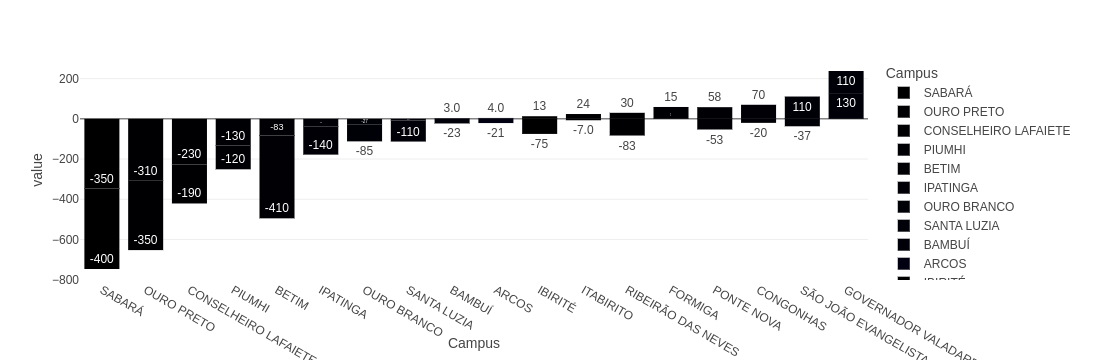

In [230]:
fig5 = px.bar(dffg1, x="Campus", y=["diff_Inscritos","diff_Homologadas"], color="Campus", text_auto='.2s')
fig5.show()

In [231]:
dffg2 = dff.groupby("Curso")[["diff_Inscritos","diff_Homologadas"]].sum().reset_index().sort_values(by='diff_Inscritos', ascending=True)
dffg2

,Curso,diff_Inscritos,diff_Homologadas
10,INFORMÁTICA,-278.0,-468.0
19,SEGURANÇA DO TRABALHO,-256.0,-196.0
8,ELETROTÉCNICA,-131.0,-161.0
11,MECATRÔNICA,-88.0,-98.0
13,MEIO AMBIENTE,-65.0,-56.0
20,SISTEMAS DE ENERGIA RENOVÁVEL,-36.0,-51.0
14,METALURGIA,-30.0,-40.0
3,AUTOMAÇÃO INDUSTRIAL,-26.0,-282.0
17,PAISAGISMO,-23.0,-26.0
15,MINERAÇÃO,-20.0,-91.0


In [232]:
dff[ dff.Campus == "PONTE NOVA" ]

,Curso,Campus,Tipo de Vaga,Turno,Nivel,2023,2024,diff_Inscritos,diff_Homologadas
5,ADMINISTRAÇÃO,PONTE NOVA,Curso Técnico Integrado,Turno: Integral,Fundamental,265,470,205.0,121.0
30,INFORMÁTICA,PONTE NOVA,Curso Técnico Integrado,Turno: Integral,Fundamental,438,291,-147.0,-174.0


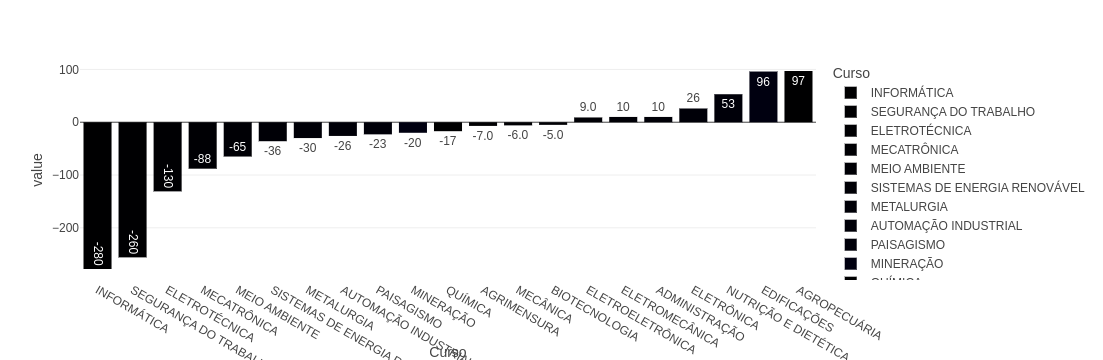

In [233]:
fig5 = px.bar(dffg2, x="Curso", y=["diff_Inscritos"], color="Curso", text_auto='.2s')
fig5.show()

In [234]:
df['Curso'].apply(lambda r: r.replace("Técnico Integrado em","").replace("Técnico Integrado","") )

0               ADMINISTRAÇÃO
1               ADMINISTRAÇÃO
2               ADMINISTRAÇÃO
3               ADMINISTRAÇÃO
4               ADMINISTRAÇÃO
               ...           
66     Segurança do Trabalho 
67     Segurança do Trabalho 
68     Segurança do Trabalho 
69     Segurança do Trabalho 
70     Segurança do trabalho 
Name: Curso, Length: 142, dtype: object

In [235]:
dfg2023 = df2023.groupby("Campus")[["Inscritos","Pagos", "Deferidas","Homologadas"]].sum().reset_index().sort_values(by='Inscritos', ascending=False)
dfg2023.sort_values('Campus')

,Campus,Inscritos,Pagos,Deferidas,Homologadas
0,ARCOS,114,84,5,89
1,BAMBUÍ,463,347,19,366
2,BETIM,2328,1882,91,1973
3,CONGONHAS,762,577,47,624
4,CONSELHEIRO LAFAIETE,708,483,54,537
5,FORMIGA,281,228,11,239
6,GOVERNADOR VALADARES,902,619,79,698
7,IBIRITÉ,951,780,30,810
8,IPATINGA,804,621,39,660
9,ITABIRITO,248,216,7,223


In [236]:
# dfg2024 = df2024.groupby("Campus")[["Inscritos","Pagos", "Deferidas","Homologadas"]].sum().reset_index().sort_values(by='Inscritos', ascending=False)
dfg2024.sort_values('Inscritos')

,Campus,Inscritos,Pagos,Deferidas,Homologadas
0,ARCOS,75,34,5,39
12,PIUMHI,92,45,10,55
5,FORMIGA,146,63,33,96
9,ITABIRITO,215,110,26,136
1,BAMBUÍ,378,168,36,204
10,OURO BRANCO,466,226,61,287
13,PONTE NOVA,469,217,50,267
4,CONSELHEIRO LAFAIETE,470,169,57,226
8,IPATINGA,510,199,54,253
3,CONGONHAS,614,243,109,352


In [237]:
dfg2024.Inscritos - dfg2023.Inscritos

0     -39
1     -85
2    -773
3    -148
4    -238
5    -135
6    -198
7    -246
8    -294
9     -33
10   -190
11   -464
12    -42
13   -234
14   -247
15   -301
16   -249
17   -107
Name: Inscritos, dtype: int64

In [238]:
df2023.Curso.unique().tolist()

['ADMINISTRAÇÃO',
 'AGROPECUÁRIA',
 'AUTOMAÇÃO INDUSTRIAL',
 'BIOTECNOLOGIA',
 'EDIFICAÇÕES',
 'ELETROELETRÔNICA',
 'ELETROMECÂNICA',
 'ELETRÔNICA',
 'ELETROTÉCNICA',
 'INFORMÁTICA',
 'MECÂNICA',
 'MECATRÔNICA',
 'MEIO AMBIENTE',
 'METALURGIA',
 'MINERAÇÃO',
 'NUTRIÇÃO E DIETÉTICA',
 'QUÍMICA',
 'SEGURANÇA DO TRABALHO',
 'SISTEMAS DE ENERGIA RENOVÁVEL',
 'AGRIMENSURA',
 'PAISAGISMO']

In [240]:
df2024.Curso.unique().tolist()

['ADMINISTRAÇÃO',
 'AGROPECUÁRIA',
 'AUTOMAÇÃO INDUSTRIAL',
 'BIOTECNOLOGIA',
 'EDIFICAÇÕES',
 'ELETROELETRÔNICA',
 'ELETROMECÂNICA',
 'ELETRÔNICA',
 'ELETROTÉCNICA',
 'INFORMÁTICA',
 'MECÂNICA',
 'MECATRÔNICA',
 'MEIO AMBIENTE',
 'METALURGIA',
 'MINERAÇÃO',
 'NUTRIÇÃO E DIETÉTICA',
 'QUÍMICA',
 'SEGURANÇA DO TRABALHO',
 'SISTEMAS DE ENERGIA RENOVÁVEL',
 'AGRIMENSURA',
 'JOALHERIA',
 'MANUTENÇÃO AUTOMOTIVA',
 'PAISAGISMO']

In [241]:
filtrar = list(set(df2024.Curso.tolist()).difference(set(df2023.Curso.tolist())) )
filtrar

['MANUTENÇÃO AUTOMOTIVA', 'JOALHERIA']

In [242]:
set(df2024.Campus.tolist()).difference(set(df2023.Campus.tolist())) 

set()

### Group by -> Cursos

In [243]:
def diff(df1, df2, campus):
    
    df11 = df1[df1['Campus']==campus].groupby("Curso")[["Inscritos","Pagos", "Deferidas","Homologadas"]].sum().reset_index().sort_values(by='Inscritos', ascending=False)
    df11.set_index('Curso', inplace=True)

    df22 = df2[df2['Campus']==campus].groupby("Curso")[["Inscritos","Pagos", "Deferidas","Homologadas"]].sum().reset_index().sort_values(by='Inscritos', ascending=False)
    df22.set_index('Curso', inplace=True)

    return (df22 - df11).reset_index()


def diff2(df1, df2, group_by):
    
    df11 = df1.groupby(group_by)[["Inscritos","Pagos", "Deferidas","Homologadas"]].sum().reset_index().sort_values(by='Inscritos', ascending=False)
    df11.set_index(group_by, inplace=True)

    df22 = df2.groupby(group_by)[["Inscritos","Pagos", "Deferidas","Homologadas"]].sum().reset_index().sort_values(by='Inscritos', ascending=False)
    df22.set_index(group_by, inplace=True)

    return (df22 - df11).reset_index()
    

In [244]:
df2023 = ler_excel('dados/2023-1_GestaoResultado_ResumoInscricoes_GRAD.xlsx')
df2024 = ler_excel('dados/2024-1_GestaoResultado_ResumoInscricoes_GRAD.xlsx')

diff(df2023, df2024, "OURO PRETO").sort_values("Inscritos")

,Curso,Inscritos,Pagos,Deferidas,Homologadas
1,CONSERVAÇÃO E RESTAURO,-47,-17,-4,-21
0,GEOGRAFIA,-33,-24,-2,-26
2,FÍSICA,-13,-3,-6,-9


In [245]:
diff2(df2023, df2024, ["Campus","Curso"]).sort_values(["Homologadas","Campus"])

,Campus,Curso,Inscritos,Pagos,Deferidas,Homologadas
9,BAMBUÍ,MEDICINA VETERINÁRIA,-115.0,-82.0,-17.0,-99.0
43,SABARÁ,ADMINISTRAÇÃO,-120.0,-79.0,-9.0,-88.0
41,RIBEIRÃO DAS NEVES,ADMINISTRAÇÃO,-139.0,-62.0,-22.0,-84.0
11,BETIM,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,-118.0,-72.0,-9.0,-81.0
46,SABARÁ,SISTEMAS DE INFORMAÇÃO,-92.0,-53.0,-17.0,-70.0
30,OURO BRANCO,ADMINISTRAÇÃO,-101.0,-54.0,-12.0,-66.0
12,BETIM,ENGENHARIA MECÂNICA,-94.0,-48.0,-17.0,-65.0
13,CONGONHAS,ENGENHARIA DE PRODUÇÃO,-75.0,-40.0,-14.0,-54.0
44,SABARÁ,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,-53.0,-41.0,-12.0,-53.0
51,SÃO JOÃO EVANGELISTA,AGRONOMIA,-36.0,-42.0,-5.0,-47.0


In [246]:
df2024[df2024['Campus'] == "OURO PRETO"]

,Curso,Tipo de Vaga,Campus,Turno,Nivel,Inscritos,Pagos,Deferidas,Homologadas
16,CONSERVAÇÃO E RESTAURO,Analise de Desempenho Escolar mais uma prova d...,OURO PRETO,Turno Noturno,Nível Médio,1,1,0,1
17,CONSERVAÇÃO E RESTAURO,Aproveitamento de notas obtidas no ENEM,OURO PRETO,Turno Noturno,Nível Médio,30,16,5,21
48,FÍSICA,Analise de Desempenho Escolar mais uma prova d...,OURO PRETO,Turno Noturno,Nível Médio,5,1,0,1
49,FÍSICA,Aproveitamento de notas obtidas no ENEM,OURO PRETO,Turno Noturno,Nível Médio,9,4,1,5
50,GEOGRAFIA,Analise de Desempenho Escolar mais uma prova d...,OURO PRETO,Turno Noturno,Nível Médio,21,3,11,14
51,GEOGRAFIA,Aproveitamento de notas obtidas no ENEM,OURO PRETO,Turno Noturno,Nível Médio,31,5,6,11


In [247]:
campus = "PONTE NOVA"

In [248]:
campus

'PONTE NOVA'

In [249]:
diff(df2023, df2024, campus)

,Curso,Inscritos,Pagos,Deferidas,Homologadas
0,PROCESSOS GERENCIAIS,NaN,NaN,NaN,NaN
1,TECNOLOGIA EM PROCESSOS GERENCIAIS,NaN,NaN,NaN,NaN


In [250]:
dfg2023Curso = df2023[df2023["Campus"] == campus].groupby("Curso")[["Inscritos","Pagos", "Deferidas","Homologadas"]].sum().reset_index().sort_values(by='Inscritos', ascending=False)
dfg2023Curso

,Curso,Inscritos,Pagos,Deferidas,Homologadas
0,PROCESSOS GERENCIAIS,91,33,15,48


In [220]:
dfg2024Curso = df2024[df2024["Campus"] == campus].groupby("Curso")[["Inscritos","Pagos", "Deferidas","Homologadas"]].sum().reset_index().sort_values(by='Inscritos', ascending=False)
dfg2024Curso

,Curso,Inscritos,Pagos,Deferidas,Homologadas
0,TECNOLOGIA EM PROCESSOS GERENCIAIS,58,16,12,28


In [221]:
dfg2023CursoX = dfg2023Curso.set_index('Curso')
dfg2023CursoX

,Inscritos,Pagos,Deferidas,Homologadas
Curso,,,,
PROCESSOS GERENCIAIS,91,33,15,48


In [197]:
dfg2024CursoX = dfg2024Curso[~dfg2024Curso['Curso'].isin(filtrar) ].set_index('Curso')
dfg2024CursoX

,Inscritos,Pagos,Deferidas,Homologadas
Curso,,,,
ADMINISTRAÇÃO,339,247,28,275
INFORMÁTICA,291,205,26,231


In [198]:
dfg2024CursoX - dfg2023CursoX

,Inscritos,Pagos,Deferidas,Homologadas
Curso,,,,
ADMINISTRAÇÃO,74,36,14,50
INFORMÁTICA,-147,-168,-6,-174
